### CSE 5243 - Introduction to Data Mining
## Homework 1: CRISP_DM Steps 1-3 (with Exploratory Data Analysis)
Replace the example information below with your real information:
- Semester: Spring 2023
- Instructor: Tom Bihari
- Section Wed/Fri  12:45PM 
- Student Name: Jiaxuan Niu 
- Student Email: niu.235@osu.edu
- Student ID: 123456789  

Based on CRISP-DM Template Version V11.

***
# Section: Overview
- Insert a short description of the scope of this exercise, any supporting information, etc.
- **(I will fill this in for each assignment - Tom Bihari)**
***

### Assignment Overview
In this assignment, you will analyze an ALTERED copy of the “Hotel Booking Demand” dataset.
- This dataset was pulled on 4/8/22 from: https://www.kaggle.com/datasets/jessemostipak/hotel-booking-demand
- The dataset file is named: **hotel_bookings_with_errors_V1.csv**

**The data has been altered slightly for use in course assignments,etc.:**
- A unique ROW attribute has been added.
- Errors have been added, such as: duplicated records, deleted records, deleted attribute values, erroneous attribute values.
**DO NOT PUBLISH THIS DATASET - it contains intentionally wrong data!**

This assignment covers the **first three of the six steps** of the **CRISP-DM process model** (Business Understanding, Data Understanding, Data Preparation). (See the CRISP-DM materials on CARMEN.)

The **objectives** of this assignment are:
- By analyzing and thinking critically about the data, you may identify interesting charcteristics that would be useful when using the data.
- The final, cleaned-up dataset that you create may be used to build classification / regression models in assignments.

### Problem Statement
Assume that you are the Director of Data Science for Buckeye Resorts, Inc. (BRI), an international hotel chain.  As is the case for all hotel chains, reservation cancellations cause significant impacts to BRI, in profitability, logistics, and other areas.  The cost to BRI of a cancelled reservation is $500 on average. 

- BRI wants to improve (decrease) the cancellation rates at its hotels, using more tailored interventions, based on newly available detailed data.  BRI processes 100,000 reservations per year, so an incremental improvement in cancellation rates would have a significant impact.

- One intervention being considered is to offer a special financial incentive to customers who have reservations, but who are “at risk” of cancellation.  BRI has performed a small pilot test, and has found that offering a $100 discount to a customer who is planning to cancel is effective 30% of the time in inducing the customer not to cancel (by locking in a “no cancellation” clause).

- BRI leadership has asked your team to analyze the new data, and determine if it is suitable for developing analyses and models that would be effective in predicting which future reservations are likely to be at risk of cancellation, so the aforementioned financial incentive could be offered.

- The head of BRI would then like you attend the upcoming BRI Board of Directors meeting.  She has asked you to present your findings to her and to the BOD, to help them decide whether to go forward with the planned tailored intervention approach, and/or to adjust or abandon the approach.  Your goal is to support the BOD in making a decision. 

You decide to look at the dataset, **explore (understand)** what it contains, and **create (prepare)** a clean dataset from it that contains the kind of information you think might be useful.

You do not yet know the specific algorithm, formula or model you will use to predict cancallations.  **That will come in a later step.**

### Things To Do
Complete the sections for the first three steps of CRISP-DM in this notebook.  Some intial guidance / sugggestions:
- **Business Understanding**: Fill in the cells, using your thoughts on the specific item.  Your answers will not be graded for "correctness", just "thoughtfulness".  Feel free to "invent" a narrative for detailed information not provided above.  Don't spend a lot of time on it.
- **Data Understanding**: There are many attributes in this dataset. Once you have done some initial analysis, you may choose to concentrate on ones that seem more promising or useful.  However, you must give evidence and explain why the attributes that you choose to give less attention warrant the lack of attention. 
- **Data Preparation**: Clean up the data and save it for future use.

It is essential that you **communicate** your goals, thought process, actions, results, and conclusions to the **audience** that will consume this work.  It is **not enough** to show just the code.  It is not appropriate to show long sections of **unexplained printout**, etc.  Be kind to your readers and provide value to them!

**ALWAYS follow this pattern** when doing **each portion** of the work.  This allows us to give feedback and assign scores, and to give partial credit.  Make it easy for the reader to understand your work.
- Say (briefly) **what** you are trying to do, and **why**.
- Do it (code).
- Show or describe the **result** clearly (and briefly as needed), and explain the significant **conclusions or insights** derived from the results. 

Based on CRISP-DM Template Version V11.

**HAVE FUN!**

***
# Section: Setup
- Add any needed imports, helper functions, etc., here.
***

In [2]:
import numpy as np
import pandas as pd

#!pip install matplotlib
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
#matplotlib.use('Qt5Agg')

import seaborn as sns

pd.set_option('display.max_columns', 50) #include to avoid ... in middle of display

***
# Section: 1 - Business Understanding
- This step is essential (and occasionally ignored…).  It focuses on understanding the business needs and objectives, and defining a data analysis problem that is relevant and useful to the business, so the right solution is built.

- Consider the following questions and discuss the possible answers to them in the spaces below.
  - It is OK to say that you do not know.  How might you get answers to the questions?
  - You may consider some of the questions to be "not applicable".  If so, why?
  - You may choose to use markdown instead of raw text in the answer cells, to make them "pretty" and easy to read.
***

**Context**
- What is the overview, history, big picture?


***We would like to develop an algorithm that can predict which future reservations are likely to be at risk of cancellation, so the financial incentive could be offered. In this way, it can improbe the cancellation rates at BRI's hotels. ***

**Business Objectives**
- What is the problem or opportunity to be addressed / solved?

**The problem is to improve the cancellation rates at BRI's hotels.**

- What is its business value?

**The cost to BRI of a cancelled reservation is $500 on average. If we can improve the cancellation rate at BRI's hotels, BRI can save a huge amount of money, which wastes on the cancelled reeservation.**


**Stakeholders**
- Who are they?
- What are their needs?

***BRI leadership. They need to decide whether to go forward with the planned tailored intervention approach, or to adjust or abandon the approach. ***

**General Goals**
- Understand the past/current state (descriptive)?
- Predict the future (predictive)?
- Mine for unknown patterns / insights?
- Answer questions?  What are they?
- Support decisions?  What are they?

**The general goal is supporting Decision, which is whether to go forward with the planned tailored intervention approach, or to adjust or abandon the approach.**

**Scope**
- What is the specific scope of the project?
- What, specifically, is NOT in scope?  (What are you not doing that someone might think you are doing?)
Is the scope flexible?  In what way?

**From my perspective, the scope of this project is just to analyze in what condition, a person might cancel the reservation for a room.**

**Deliverables**
- Report?
- Reusable code?
- Presentation?

**Presentation.**

**Success Criteria**
- What, specifically, must be accomplished for this project to be a success?

**Analyze whether to go forward with the planned tailored intervention approach, or to adjust or abandon the approach**

**Solution Approach**
- Is this a “one time” (throw away) solution?
- Or will the solution become part of repeated process that is used and enhanced over time?

**From my perspective, this solution will become part of repeated process that is used and enhanced over time because we need if the plan is still valid after a while.**

**Quality**
- What level of Correctness or Confidence is needed?
- Is this life-critical or are we looking for ‘directionally correct’ results?

**results correct and supportable. From my perspective, the level of correctness should be between life-critical and "directionally correct results".**

**Constraints**
- Are there legal / regulatory implications (privacy, security, liability, HIPAA, FERPA)?
- Are there architectural constraints?

**TBD. So far I don't think there are any constraints. Maybe we need to talk with leadership about the constraints.**

**Time / Cost**
- What is the deadline or budget?

**Before the upcoming BRI Board of Directors meetings**

**probably low cost**

**Dependencies**
- Is this project dependent on any other project or activity?
- Is any other project or activity dependent on this project?

**The decision of BRI BOD depends on this project.**

**Resources Needed**
- Do you potentially need access to specific people, data, etc?

**I need the data of customers who have resercations and then cancelled.**

**Other Considerations**
- What other considerations, not covered above, might be relevant?

**I don't have other considerations.**

***
# Section: 2 - Data Understanding
- Perform exploratory data analysis of the dataset by looking at individual attributes and/or combinations of attributes. You should focus on identifying and describing interesting observations and insights that you might uncover from the data.
- You should not simply provide the basic EDA information for all attributes in the data. Instead, you should focus on those that are more interesting or important, and provide some discussion of what you observe. Pay particular attention to potentially interesting bivariate (two-variable) relationships, as well as the relationship between each attribute and the class attribute (if this is a classification problem).
- This step includes:
  - Understanding what data might be available and relevant.
  - Acquiring the data.
  - Understanding the characteristics of the data (e.g., quality, completeness, currency, consistency,…).
  - Understanding how other datasets might enhance or supplement the data (and acquiring that data as well).
  - Possibly performing some initial analysis to build confidence that the overall direction is likely to be helpful to the business problem to be solved.

**NOTE:** Frequently, a first pass is made through the data to fix or remove "obvious" data quality issues (missing values, duplicate records, outliers (some), etc.).  The deeper Data Understanding analysis then is done on the "cleaned" data.  This mitigates the issue of bad data skewing the data analysis results.  **For this example, we will not do this separate first pass.**
***

***
## Section: 2.1 - Describe the meaning and type of data for each attribute.

Identify the type of data for each attribute.
  - Categorical: Nominal, Ordinal
  - Numerical: Interval, Ratio
  - Other: Complex or unstructured data (e.g., text strings, images,...)
  
NOTES:
  - This determines what operations are "meaningful" for each attribute.  For example, you can't add two Ordinal attributes.
  - You can't always tell the attribute types from the data itself.  For example, an Integer attribute could be Ordinal or Interval.

Identify interesting characteristics of the data (e.g., quality, completeness, currency, consistency,…).
  - Is this dataset relevant and appropriate for the goals of this project?
    - If not, what could you do? (find other data to replace or supplement this dataset, etc.)
***

### **Examine the meta-data (e.g., from data dictionary) available for the dataset.**

*   **Attribute, Type, DataType**
*   ROW, ordinal, integer
*   hotel, nominal, string 
*   is_canceled, naminal,   float
*   lead_time, interval,   int  
*   arrival_date_year, interval, int  
*   arrival_date_month, ordinal, string 
*   arrival_date_week_number, interval,  int  
*   arrival_date_day_of_month, interval,   int  
*   stays_in_weekend_nights, interval,  int  
*   stays_in_week_nights, interval, int  
*  adults, interval,  int  
*  children, interval, float
*  babies, interval, int  
*  meal, nominal, string
*  country, nominal, string 
*  market_segment, nominal, string
*  distribution_channel, nominal, string 
*  is_repeated_guest, ratio, int  
*  previous_cancellations, interval, int  
*  previous_bookings_not_canceled,interval, int  
*  reserved_room_type, nominal, string
*  assigned_room_type, nominal, string
*  booking_changes,interval, int  
*  deposit_type, nominal, string
*  agent, nominal, float
*  company, nominal, float
*  days_in_waiting_list, interval, int  
*  customer_type, nominal, string
*  adr, ratio, float
*  required_car_parking_spaces, interval. int  
*  total_of_special_requests, interval,int  
*  reservation_status, nominal, string
*  reservation_status_date, interval, Date 





**Discussion:**

I feel like there are something wrong with the DataType of **chilren** because it uses float as the DayaType. I think it should be int because the number of children can only be an integer and it is really odd with a float DataType.

### **Load the Dataset.**

In [3]:
#OPTIONAL: Load it only once per session, and save it, so we don't waste time
try:
    _ = data_from_source_file_df
    print("Reusing source data")
except:
    print("Loading source data")
    data_from_source_file_df = pd.read_csv("hotel_bookings_with_errors_V1.csv")
data_df = data_from_source_file_df

Loading source data


In [4]:
# Print the schema, based on the data in the file.
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119391 entries, 0 to 119390
Data columns (total 33 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   ROW                             119391 non-null  int64  
 1   hotel                           119391 non-null  object 
 2   is_canceled                     119390 non-null  float64
 3   lead_time                       119391 non-null  int64  
 4   arrival_date_year               119391 non-null  int64  
 5   arrival_date_month              119391 non-null  object 
 6   arrival_date_week_number        119391 non-null  int64  
 7   arrival_date_day_of_month       119391 non-null  int64  
 8   stays_in_weekend_nights         119391 non-null  int64  
 9   stays_in_week_nights            119391 non-null  int64  
 10  adults                          119391 non-null  int64  
 11  children                        119387 non-null  float64
 12  babies          

In [5]:
all_attribute_names = list(data_df)
print(all_attribute_names)
class_attribute_name = 'is_canceled'
nominal_attribute_names = ['is_canceled','hotel', 'meal', 'country', 'market_segment', 'distribution_channel','reserved_room_type','assigned_room_type','deposit_type','agent','company','customer_type','reservation_status']
ordinal_attribute_names = ['arrival_date_month'] #['row_id', 'zone']  # row_id may not be needed
categorical_attribute_names = nominal_attribute_names + ordinal_attribute_names
interval_attribute_names = ['lead_time','arrival_date_year','arrival_date_week_number','arrival_date_day_of_month','stays_in_weekend_nights','stays_in_week_nights','adults','children','babies','previous_cancellations','previous_bookings_not_canceled','booking_changes','days_in_waiting_list','required_car_parking_spaces','total_of_special_requests']
ratio_attribute_names = ['is_repeated_guest']
numerical_attribute_names = interval_attribute_names + ratio_attribute_names

['ROW', 'hotel', 'is_canceled', 'lead_time', 'arrival_date_year', 'arrival_date_month', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'meal', 'country', 'market_segment', 'distribution_channel', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'reserved_room_type', 'assigned_room_type', 'booking_changes', 'deposit_type', 'agent', 'company', 'days_in_waiting_list', 'customer_type', 'adr', 'required_car_parking_spaces', 'total_of_special_requests', 'reservation_status', 'reservation_status_date']


**Discussion:**

I kind of have the similiar idea as the dicussion I just mentioned above. I think the Datatype of children is wrong. Also, for the count of is_cancled, children is wrong. I assume those two attributes miss some datas. Also, I am confused about why the counts of agent and company are largely different from others. 

***
## Section: 2.2 - Provide basic statistics for the attributes.
- For example: counts, percentiles, mean, median, standard deviation. The statistics should be relevant for the type of attribute.
***

In [6]:
data_df.describe() # this is used to calculates statistics for all numerical columns

,ROW,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119391.000000,119390.000000,119391.000000,119391.000000,119391.000000,119391.000000,119391.000000,119391.000000,119391.000000,119387.000000,119391.000000,119391.000000,119391.000000,119391.000000,119391.000000,103051.00000,6797.000000,119391.000000,119391.000000,119391.000000,119391.000000
mean,59694.000050,0.370408,104.010662,2016.156544,27.165172,15.798117,0.927591,2.500297,1.856572,0.103889,0.007949,0.031912,0.087117,0.137096,0.221122,86.69487,189.266735,2.321130,101.831089,0.062517,0.571366
std,34465.357245,0.482916,106.862967,0.707481,13.605081,8.780897,0.998613,1.908278,0.582185,0.398560,0.097436,0.175766,0.844333,1.497431,0.652303,110.77504,131.655015,17.594648,50.535580,0.245290,0.792796
min,0.000000,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,29846.500000,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.00000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,59694.000000,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.00000,179.000000,0.000000,94.590000,0.000000,0.000000
75%,89541.500000,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.00000,270.000000,0.000000,126.000000,0.000000,1.000000
max,119389.000000,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.00000,543.000000,391.000000,5400.000000,8.000000,5.000000


**Discussion:**

*   The extreme large max value of **stays_in_weekend_nights** is clear wrong and the max should be 2. 
*   The extreme large max value of **stays_in_week_nights** is clear wrong and the max should be 5. 
*   The extreme large max value of **adults** is clear wrong and the max should be 2. 
*   The extreme large max value of **children** is clear wrong and can be filled in by the formula in the metadata. 
*   The extreme large max values of **lead_time, babies, lead_timedays_in_waiting_list** are clear wrong and can be filled in by the formula in the metadata. 
*   The negative **adr** is clearly wrong and can be filled in by the formula in the metadata.
*   The **children, agent, company** counts are different from the other counts. It will be handled below.












***
## Section: 2.3 - Visualize / analyze the most important or interesting attributes using appropriate techniques.
- For each visualization, provide an interpretation explaining why it is appropriate or interesting. What does each visualization tell us?
***

In [7]:
print("Total Records:", data_df.shape[0], "- Value Counts per Categorical Attribute:\n")
important_attribute_names = ['is_canceled','stays_in_weekend_nights','stays_in_week_nights', 'children','adults']
for att in categorical_attribute_names:
  print(data_df[att].value_counts(normalize = False, sort = True, ascending = False, bins = None, dropna = False))
  print("\n")
for att in important_attribute_names:
  print(data_df[att].value_counts(normalize = False, sort = True, ascending = False, bins = None, dropna = False))
  print("\n")

Total Records: 119391 - Value Counts per Categorical Attribute:

0.0    75167
1.0    44223
NaN        1
Name: is_canceled, dtype: int64


City Hotel      79330
Resort Hotel    40061
Name: hotel, dtype: int64


BB           92311
HB           14463
SC           10650
Undefined     1169
FB             798
Name: meal, dtype: int64


PRT    48590
GBR    12130
FRA    10415
ESP     8568
DEU     7287
       ...  
DJI        1
BWA        1
HND        1
VGB        1
NAM        1
Name: country, Length: 178, dtype: int64


Online TA        56477
Offline TA/TO    24219
Groups           19811
Direct           12606
Corporate         5295
Complementary      743
Aviation           237
Undefined            2
Onlin TA             1
Name: market_segment, dtype: int64


TA/TO        97871
Direct       14645
Corporate     6677
GDS            193
Undefined        5
Name: distribution_channel, dtype: int64


A    85995
D    19201
E     6535
F     2897
G     2094
B     1118
C      932
H      601
P       12
L

**Discussion:**

The reason why I choose these five attributes, **is_canceled, stays_in_weekend_nights,stays_in_week_nights, children, adults**, to visualize and analyze is these five attributes are found containning suspicious values in the last section. 
I think there may be data quality issues in these four attributes.


*   For the attribute **is_canceled**, the NaN shows that there is one missing value here.
*   For the attribute **stays_in_weekend_nights**, those data which are above 2 are clearly wrong. There must be something wrong with these data, like typo. 
*   For the attribute **stays_in_week_nights**, those data which are above 5 are clearly wrong. There must be something wrong with these data, like typo. 
*   For the attribute **children**, it is clearly that the data, 10.0, is wrong. I think this is a typo. Also, the NaN value are discussed in the section below. 
*   For the attribute **adults**,those data which are above 4 are clearly wrong. There must be something wrong with these data, like typo. They might be soem typos. Take the value 22 as an example, it may need to change to 2.
*  For those left categorical attributes, I didn't find some unique name in them.





***
## Section: 2.4 - Verify data quality: explain any missing values, duplicate data, or outliers.
- What, if anything, do you need to do about these? Be specific.
***

# Missing Attribute Values

In [8]:
# Count the missing values for the entire dataframe.
na_df = data_df[data_df.isna().any(axis=1)]
num_records_with_na = na_df.shape[0]
num_na_values = na_df.isna().sum().sum()

print("Total Records:", data_df.shape[0], "- Number of Records with NA:", num_records_with_na, "- Number of NA Values:", num_na_values)
na_df.head(10)

# Show the missing values for each attribute.
print("NA Values per Attribute:")
for att in all_attribute_names:
    num_na = na_df[att].isna().sum()
    if num_na > 0:
        print(att,na_df[att].isna().sum())

Total Records: 119391 - Number of Records with NA: 119174 - Number of NA Values: 129427
NA Values per Attribute:
is_canceled 1
children 4
country 488
agent 16340
company 112594


**Discussion:**



*   The missing **is_canceled** is problematic. I think the data of is_canceled is one of the most important attributes for tainning a classier model. Therefore, we should remove this record. 
*   The missing **children** is problematic. If the children is the "class" attribute and we want to use this dataset for training a classifier model, then we should remove this record.
*   The missing value of **agent** and **company**. I think the NaN value may represent that there is no agent or company that made the booking. Therefore, I think we shouldn't change it. 
*   The missing **country** is also problematic. If the country is the "class" attribute and we want to use this dataset for training a classifier model, then we should remove this record.






# Duplicate Records

In [9]:
# Find duplicate records across one or more specific attributes.
# This is useful for finding duplicate records that have the same "unique identifier", which should never happen.
dup_df = data_df[data_df.duplicated(['ROW',])]
num_dup_records = dup_df.shape[0]

list_of_duplicates = dup_df['ROW'].unique()
list_of_duplicates.sort()
#print(list_of_duplicates)
complete_dup_df = data_df.loc[data_df['ROW'].isin(list_of_duplicates)]

print("Number of duplicate record (multiples) for the *ROW* attribute:", num_dup_records)
complete_dup_df.head(10)

Number of duplicate record (multiples) for the *ROW* attribute: 1


,ROW,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
5,5,Resort Hotel,0.0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,7/3/2015
6,5,Resort Hotel,0.0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,7/3/2015


**Discussion:**

The row 6 records are completely same as the Row 5 records. 
I suggust to remove the duplicate row 6. 

# Outliers

In [10]:
# This is a simple filter that uses 1.5 x the Inter-Quantile Range.
# See: https://stackoverflow.com/questions/69248118/detect-outliers-across-all-columns-of-pandas-dataframe
def find_outliers(df_in, att_name):
    quantile_low  = 0.15  # These are typical values, but you can set them as apropriate - see literature
    quantile_high = 0.75
    multiplier = 1.5
    
    Q1 = df_in[att_name].quantile(quantile_low)
    Q3 = df_in[att_name].quantile(quantile_high)
    IQR = Q3-Q1
    good_range_low  = Q1 - multiplier * IQR+0.5
    good_range_high = Q3 + multiplier * IQR+1.5
    
    outlier_list=((df_in[att_name] <= good_range_low) | (df_in[att_name] >= good_range_high)).tolist()
    outlier_indices=[i for i, x in enumerate(outlier_list) if x]

    print("\nAttribute: [", att_name, "]   Good Range: [",good_range_low, ",", good_range_high, "]   Number of Outliers: [", len(outlier_indices),"]")
        
    if len(outlier_indices) > 0:
        outlier_value_list = []
        for i in outlier_indices:
            outlier_value_list.append( [i, df_in.iloc[i][att_name]] )
            
        from operator import itemgetter
        outlier_value_list = sorted(outlier_value_list, key=itemgetter(1), reverse=True)
        
        print("Index           Value")
        for i in outlier_value_list:
            print("%5d      %10.3f" % (i[0], i[1]))

        plt.figure(figsize=(10,1))
        sns.boxplot(x=att_name, data=df_in)
        plt.show()
    
    return outlier_indices


Attribute: [ adults ]   Good Range: [ 0.0 , 5.0 ]   Number of Outliers: [ 420 ]
Index           Value
 2174          55.000
 1644          50.000
 1540          40.000
 1918          27.000
 1963          27.000
 1588          26.000
 1753          26.000
 1885          26.000
 2004          26.000
 2165          26.000
   19          22.000
 2229          20.000
 2419          20.000
 2418          10.000
 2230           6.000
 2232           5.000
 2420           5.000
 2225           0.000
 2410           0.000
 3182           0.000
 3685           0.000
 3709           0.000
 4128           0.000
 9377           0.000
31766           0.000
32030           0.000
32828           0.000
34850           0.000
34856           0.000
37460           0.000
40393           0.000
40923           0.000
40985           0.000
41021           0.000
41049           0.000
41057           0.000
41447           0.000
41953           0.000
42453           0.000
42592           0.000
42872           0

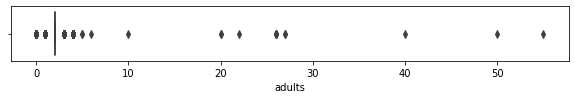

In [11]:
outlier_indices = []
outlier_attribute_name =['adults']
for att in outlier_attribute_name:
    outlier_indices = find_outliers(data_df, att)
    outlier_indices.extend(outlier_indices)

**Discussion:**

For the attribtue, I set the good range between 0 and 5 (exclusive) becasue I think a room should at least have one adults and at most four adults. The hotel should not be lived in by a kid without an adult. I think there must be some typos here so I will choose to remove all of the values greater than 4 and less than 1 in the later section. 

***
## Section: 2.5 - Explore the relationships among the attributes.
- You may include or exclude the class attribute as appropriate.
- Use scatter plots, correlation matrices, cross-tabulations, group-wise averages, or other appropriate techniques. Explain and interpret any interesting relationships.
- There are three general cases for 2-attribute relationships:
  - Categorical vs Categorical
  - Categorical vs Numerical
  - Numerical vs Numerical
***

# Categorical vs Categorical

In [12]:
# Use Chi-Squared test to check for a relationship between all pairs of categorical variables.
def create_chi2_matrix(df):
    #See: https://medium.com/analytics-vidhya/constructing-heat-map-for-chi-square-test-of-independence-6d78aa2b140f
    import pandas as pd
    import numpy as np
    import os 
    from sklearn.feature_selection import chi2
    from scipy import stats
    import seaborn as sns
    import matplotlib.pylab as plt

    column_names=df.columns # Assign column names to row indexs 
    chisqmatrix=pd.DataFrame(df,columns=column_names,index=column_names)

    # Set counters to zero
    outercnt=0
    innercnt=0

    for icol in column_names: # outer loop
        for jcol in column_names: # inner loop
            # Convert to cross tab - for Chi-square test, we have to first convert variables into contigency table
            mycrosstab=pd.crosstab(df[icol],df[jcol])
            #print(mycrosstab)
            # Get p-value and other information
            stat,p,dof,expected=stats.chi2_contingency(mycrosstab)
            #print("Details:",icol,jcol,stat,p,dof)
            # Rounding very small p-values to zero
            chisqmatrix.iloc[outercnt,innercnt]=round(p,10)
            # Expected frequencies should be at least 5 for the majority (80%) of the cells.
            # Check expected frequency of each group
            cntexpected=expected[expected<5].size
            # Getting percentage 
            perexpected=((expected.size-cntexpected)/expected.size)*100
            if perexpected<20:
                chisqmatrix.iloc[outercnt,innercnt]=2.00        # Assign 2 as a flag 
            if icol==jcol:
                chisqmatrix.iloc[outercnt,innercnt]=0.00
            innercnt=innercnt+1
        outercnt=outercnt+1
        innercnt=0
    return chisqmatrix

In [13]:
# Use Chi-Squared test to check for relationships between all pairs of categorical variables.
# If a p-value in the table below is less than a chosen alpha (say 0.05), then the H0 hypothesis that
# There is NO relationship between the two variables is REJECTED.
seleceted_categorical_name = ['is_canceled','hotel','meal','deposit_type','company','reserved_room_type','assigned_room_type']
chi2matrix = create_chi2_matrix(data_df[seleceted_categorical_name]) 
print(chi2matrix.head(999))

                    is_canceled hotel meal deposit_type  company  \
is_canceled                 0.0   0.0  0.0          0.0      0.0   
hotel                       0.0   0.0  0.0          0.0      0.0   
meal                        0.0   0.0  0.0          0.0      2.0   
deposit_type                0.0   0.0  0.0          0.0      2.0   
company                     0.0   0.0  2.0          2.0      0.0   
reserved_room_type          0.0   0.0  0.0          0.0      2.0   
assigned_room_type          0.0   0.0  0.0          0.0      2.0   

                   reserved_room_type assigned_room_type  
is_canceled                       0.0                0.0  
hotel                             0.0                0.0  
meal                              0.0                0.0  
deposit_type                      0.0                0.0  
company                           2.0                2.0  
reserved_room_type                0.0                0.0  
assigned_room_type                0.0     

**Discussion:**

We tested the realationship between each categorical attributes ('is_canceled', 'hotel', 'meal', 'deposit_type', 'company', 'reserved_room_type', 'assigned_room_type') and the calss attribute is_canceled using the Chi-squared test. The reason why I select those attribute is that I think they may play a role in the cancellation of booking. The result shows that thereis a relationship between all pairs of variables, EXCEPT company. 

# Categorical Attribute vs Numerical Attribute

In [14]:
# Compute ANOVA for a specific categorical and numerical variable pair.
# Note: You also can use the t-test if there are only two values for the categorical variable.
def anova_test(data_frame, categorical_variable, numerical_variable, alpha):
    # See: https://towardsdatascience.com/statistics-in-python-using-anova-for-feature-selection-b4dc876ef4f0
    # Calculate the f-value using the statsmodel module. 
    # You first build the model using the ols() function, and then call the fit() function on the instance of the model.
    # Finally, you call the anova_lm() function on the fitted model and specify the type of ANOVA test to perform on it:
    #   There are 3 types of ANOVA tests to perform, but their discussion is beyond the scope of this discussion.
    # Note: Hypothesis H0 = There is NO significant influence of the categorical variable on the numerical variable.
    import statsmodels.api as sm
    from statsmodels.formula.api import ols

    param_string = numerical_variable + " ~ " + categorical_variable
    model = ols(param_string, data=data_frame).fit()
    result = sm.stats.anova_lm(model, typ=2)
    #print(result)

    p_value = result.iat[0, 3]
    reject_h0 = (p_value < alpha)
    return p_value, reject_h0

In [15]:
# Compute ANOVA for the categorical attribute "species" and each numerical attribute.
# Note: Hypothesis H0 = There is NO significant influence of the categorical attribute on the numerical attribute.
alpha = 0.05  # Chosen by the data analyst, based on the business problem.
cat_att = "is_canceled"

print("   P_Value             Reject_H0        Cat_Attribute        Num_Attribute")
for num_att in numerical_attribute_names:
    p_value, reject_h0 = anova_test(data_df, cat_att, num_att, alpha)
    print("%10.6g  %20s %20s %20s" % (p_value, reject_h0, cat_att, num_att))

   P_Value             Reject_H0        Cat_Attribute        Num_Attribute
         0                  True          is_canceled            lead_time
8.08757e-09                  True          is_canceled    arrival_date_year
0.00487025                  True          is_canceled arrival_date_week_number
 0.0350288                  True          is_canceled arrival_date_day_of_month
  0.539679                 False          is_canceled stays_in_weekend_nights
1.17069e-17                  True          is_canceled stays_in_week_nights
4.71247e-94                  True          is_canceled               adults
 0.0808649                 False          is_canceled             children
2.93751e-29                  True          is_canceled               babies
8.66295e-319                  True          is_canceled previous_cancellations
1.50308e-87                  True          is_canceled previous_bookings_not_canceled
         0                  True          is_canceled      booking_ch

**Discussion**



*   Based on the Anova test, with Alpha chosen to be 0.05, there is a relationship between is_canceled and each of the numerical attributes.
*   There are attributes shows false in the column, Rejct_H0, which means that there is NO significant influence of the categorical attribute on the numerical attribute. However, I think there might be some data error in those two attributes. We should revise/ remove some data in them.  



# Numerical Attribute vs Numerical Attribute

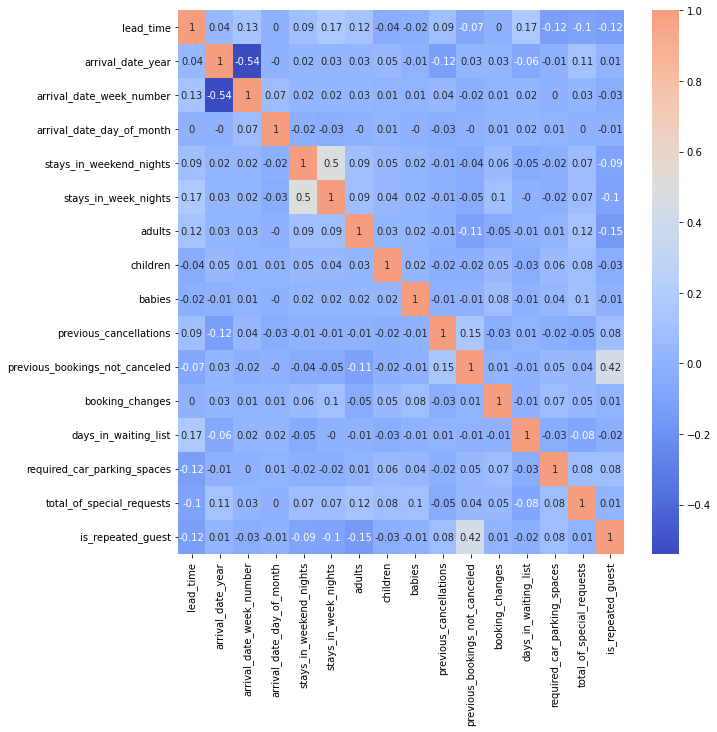

In [16]:
cor = data_df[numerical_attribute_names].corr(method='pearson').round(2)
plt.figure(figsize=(10,10))
sns.heatmap(cor,annot=True, center=0.5, cmap='coolwarm')

**Discussion:**



*   Based on the Pearson correlations, there is a (linear) relationship between many pairs of numerical attributes.




***
## Section: 2.6 - Identify and explain any interesting relationships between the class attribute and the other attributes.
- You may refer to earlier analyses / visualizations (if you included the class attribute above) or create new ones.
***

**Discussion:**

* I assume the attributes, is_canceled is the class attribute and I already visualized the relationships between the class attribute and the other attributes. 
*   As shown in the previous sections, all of the categorical and numberical attributes has a significant relationshio with the is_canceled attribute.


***
# Section: 3 - Data Preparation
In this step, the “final” target dataset is constructed (although nothing is ever final…), based on the insights gleaned in the Data Understanding step.
This may include:
- Normalizing / standardizing the data.
- Handling missing and erroneous data.
- Transforming or eliminating attributes.
- “Blending” data from multiple sources (with attention to consistency of the various sources).
- Deploying the data to storage in suitable formats, data models / structures.

**NOTE:** In each of these sections, it is OK to decide to **not** make changes to the dataset, but you **must** explain **why** you made the choice.  Recall that the purpose of this step is to produce a clean dataset that is suitable for the intended purposes.  So, for example, you might choose to not remove any attributes, but if you have 100 apparently irrelevant attributes, explain why are you keeping them - there may be a good reason.
***

***
## Section: 3.1 - Clean the Data
- Implement any data cleaning steps previously identified.  Please justify.
- Show the effects of that cleaning through the use of appropriate statistics and/or visualizations.
***

In [17]:
clean_data_df = data_df.copy()

**Revise the data**

is_canceled: 

For the **is_canceled** attribute, there is one missing value here, which is a problematic. I will choose to remove this missing record here because it is really hard to decides what value in this missing records and the is_canceled attribute is extremely important. 

In [18]:
clean_data_df = clean_data_df.dropna(subset=['is_canceled'])
clean_data_df = clean_data_df.reset_index(drop=True)

children:

For the **children** attribute, there is four missing value here, which is a problematic. I will choose to remove this missing record here because it is really hard to decides what value in this missing records.

In [19]:
clean_data_df = clean_data_df.dropna(subset=['children'])
clean_data_df = clean_data_df.reset_index(drop=True)

country:

For the **coutry** attribute, there are more than 400 missing values here, which is a problematic. I will choose to remove this missing record here because it is really hard to decides what value in this missing records.

In [20]:
clean_data_df = clean_data_df.dropna(subset=['country'])
clean_data_df = clean_data_df.reset_index(drop=True)

adults: 

For the **adults** attribute, there are several data greater than 4 and less than 1. I think 4 is the max value for the adults attribute because it is really weird that a room live in more than 4 adults and 1 is the min value because the hotel should not be lived in by a kid without an adult. I think there must be some typos here so I will choose to remove all of the values greater than 4 and less than 1.  

In [21]:
# I first change the outlier data to nan and then drop the row with nan value.
clean_data_df.loc[(clean_data_df.adults >= 5) | (clean_data_df.adults <= 0),'adults'] = \
    np.nan
clean_data_df = clean_data_df.dropna(subset=['adults'])
clean_data_df = clean_data_df.reset_index(drop=True)

stays_in_week_nights:

For the **stays_in_week_nights** attribute, there are several data greater than 5, which is clearly wrong I think there must be some typos here so I will choose to remove all of the values greater than 5 .

In [22]:
# I first change the outlier data to nan and then drop the row with nan value.
clean_data_df.loc[(clean_data_df.stays_in_week_nights >= 6),'arrival_date_week_number'] = \
    np.nan
clean_data_df = clean_data_df.dropna(subset=['arrival_date_week_number'])
clean_data_df = clean_data_df.reset_index(drop=True)

stays_in_weekend_nights:

For the **stays_in_weekend_nights** attribute, there are several data greater than 2, which is clearly wrong I think there must be some typos here so I will choose to remove all of the values greater than 2.

In [23]:
# I first change the outlier data to nan and then drop the row with nan value.
clean_data_df.loc[(clean_data_df.stays_in_weekend_nights >= 3) ,'stays_in_weekend_nights'] = \
    np.nan
clean_data_df = clean_data_df.dropna(subset=['stays_in_weekend_nights'])
clean_data_df = clean_data_df.reset_index(drop=True)

Row: 

The row 6 records are completely same as the Row 5 records. I suggust to remove all but one of the duplicate rows.

In [24]:
clean_data_df.drop_duplicates(keep='first', inplace=True)  # This removes all but one copy of the records that are completely identical.
clean_data_df = clean_data_df.reset_index(drop=True)

**Check the Results**

In [25]:
data_df.describe()

,ROW,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119391.000000,119390.000000,119391.000000,119391.000000,119391.000000,119391.000000,119391.000000,119391.000000,119391.000000,119387.000000,119391.000000,119391.000000,119391.000000,119391.000000,119391.000000,103051.00000,6797.000000,119391.000000,119391.000000,119391.000000,119391.000000
mean,59694.000050,0.370408,104.010662,2016.156544,27.165172,15.798117,0.927591,2.500297,1.856572,0.103889,0.007949,0.031912,0.087117,0.137096,0.221122,86.69487,189.266735,2.321130,101.831089,0.062517,0.571366
std,34465.357245,0.482916,106.862967,0.707481,13.605081,8.780897,0.998613,1.908278,0.582185,0.398560,0.097436,0.175766,0.844333,1.497431,0.652303,110.77504,131.655015,17.594648,50.535580,0.245290,0.792796
min,0.000000,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,29846.500000,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.00000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,59694.000000,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.00000,179.000000,0.000000,94.590000,0.000000,0.000000
75%,89541.500000,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.00000,270.000000,0.000000,126.000000,0.000000,1.000000
max,119389.000000,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.00000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [26]:
clean_data_df.describe()

,ROW,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,113287.000000,113287.000000,113287.000000,113287.000000,113287.000000,113287.000000,113287.000000,113287.000000,113287.000000,113287.000000,113287.000000,113287.000000,113287.000000,113287.000000,113287.000000,97805.000000,6436.000000,113287.000000,113287.000000,113287.000000,113287.000000
mean,61068.409615,0.372179,102.624087,2016.158138,27.131922,15.850777,0.822036,2.246392,1.858748,0.098520,0.007768,0.032334,0.090134,0.135399,0.212063,83.386616,187.837477,2.436414,102.002999,0.062134,0.565361
std,34150.085860,0.483388,107.134149,0.706463,13.651176,8.764288,0.836327,1.357985,0.478569,0.385522,0.096601,0.176886,0.865384,1.504796,0.623084,109.220608,132.144835,18.029698,50.151881,0.244561,0.789206
min,0.000000,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,0.000000,0.000000,0.000000
25%,31993.500000,0.000000,17.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,53.000000,0.000000,70.000000,0.000000,0.000000
50%,61664.000000,0.000000,67.000000,2016.000000,27.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,174.000000,0.000000,95.000000,0.000000,0.000000
75%,90503.500000,1.000000,157.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,196.000000,263.000000,0.000000,126.000000,0.000000,1.000000
max,119388.000000,1.000000,737.000000,2017.000000,53.000000,31.000000,2.000000,5.000000,4.000000,3.000000,10.000000,1.000000,26.000000,72.000000,18.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


**Discussion:**

I found an interesting thing that I haven't intentionally remove the row with a negative adr value but this row is already removed.

In [27]:
dup_df = clean_data_df[clean_data_df.duplicated()]
num_dup_records = dup_df.shape[0]
print("Number of duplicate records across all attributes:", num_dup_records)
dup_df.head(10)

Number of duplicate records across all attributes: 0


,ROW,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date


In [28]:
# Count the missing values for the entire dataframe.
na_df = clean_data_df[data_df.isna().any(axis=1)]
num_records_with_na = na_df.shape[0]
num_na_values = na_df.isna().sum().sum()

print("Total Records:", data_df.shape[0], "- Number of Records with NA:", num_records_with_na, "- Number of NA Values:", num_na_values)
na_df.head(10)

# Show the missing values for each attribute.
print("NA Values per Attribute:")
for att in all_attribute_names:
    num_na = na_df[att].isna().sum()
    if num_na > 0:
        print(att,na_df[att].isna().sum())

<ipython-input-28-43c695922c8d>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  na_df = clean_data_df[data_df.isna().any(axis=1)]


Total Records: 119391 - Number of Records with NA: 113072 - Number of NA Values: 122079
NA Values per Attribute:
agent 15440
company 106639


**Discussion:**

As I mentioned above, I will not choose to change the agent and company because I think they could be NaN, which means the consumer booked the hotel by himself.

***
## Section: 3.2 - Select Attributes
- Optionally, remove attributes that are unneeded, redundant, etc., for the expected uses.
- Which attributes did you decide to remove, if any? Please justify.
***

**Discussion:**

Based on the ChiSquared test, with Alpha chosen to be 0.05, there is a relationship between all pairs of variables, EXCEPT company. Also, we found there are a huge number of NaN value in company. From my perspective, this attribtue is redundant. It cann't help us to make decision. 

In [29]:
# Remove the attributes
clean_data_df.drop('company', axis=1, inplace=True)

In [30]:
clean_data_df.describe()

,ROW,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,113287.000000,113287.000000,113287.000000,113287.000000,113287.000000,113287.000000,113287.000000,113287.000000,113287.000000,113287.000000,113287.000000,113287.000000,113287.000000,113287.000000,113287.000000,97805.000000,113287.000000,113287.000000,113287.000000,113287.000000
mean,61068.409615,0.372179,102.624087,2016.158138,27.131922,15.850777,0.822036,2.246392,1.858748,0.098520,0.007768,0.032334,0.090134,0.135399,0.212063,83.386616,2.436414,102.002999,0.062134,0.565361
std,34150.085860,0.483388,107.134149,0.706463,13.651176,8.764288,0.836327,1.357985,0.478569,0.385522,0.096601,0.176886,0.865384,1.504796,0.623084,109.220608,18.029698,50.151881,0.244561,0.789206
min,0.000000,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,31993.500000,0.000000,17.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,70.000000,0.000000,0.000000
50%,61664.000000,0.000000,67.000000,2016.000000,27.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,95.000000,0.000000,0.000000
75%,90503.500000,1.000000,157.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,196.000000,0.000000,126.000000,0.000000,1.000000
max,119388.000000,1.000000,737.000000,2017.000000,53.000000,31.000000,2.000000,5.000000,4.000000,3.000000,10.000000,1.000000,26.000000,72.000000,18.000000,535.000000,391.000000,5400.000000,8.000000,5.000000


***
## Section: 3.3 - Create Attributes
- Optionally, create new attributes based on the values of other attibutes.
- Which new attributes did you decide to create, if any? Please justify.
***

**Discussion:**

I think we don't need to create any attributes. This is because I feel like the attributes in the clean_data_df are already closely related to the is_canceled attribute and it is really easy to use them to analyze the relationship with booking cancelation. Therefore, I think we don't need to creat any attributes. 

***
## Section: 3.4 - Transform Attributes
- Optionally, transform existing attributes (e.g., standardize, normalize, change units of measure, encode) to make them more appropriate for the expected uses.
- Which attributes did you decide to transform, if any? Please justify.
***

**Discussion:**

From my perspective, we don't need to transform attributes in the clean_data_df. This is because if we want to transfrom existing attributes, like normalizing an attribute to make it has standard deviation 1, it will change the original data. In the clear_data_df, all attributes' values have their own meaning, for example the value 2 in attribute adults means there are 2 adults in the Room. If you change the value, the data will lose its meaning. Therefore, I choose not to transform any attribute. 

***
## Section: 3.5 - Select Records
- Optionally, select a subset of the records, via sampling, etc., to decrease the size of the dataset. Please justify.
***

**Discussion:**

I think we don't need to decrease the size of the dataset. This is because we really need a large amount of data to calculate the algorithm. The small sample dataset are not really useful for us to built the algorithm. The data result in the sample is largely different from the actual data.

***
## Section: 3.6 - Other Data Preparation
- Optionally, perform other preparation steps (e.g., to optimize storage, retrieval, etc.). Please justify.
***

**Discussion:**

We don't need to perform any other steps. This is because I think the data is already cleaned after the above sections.

***
# Section: 4 - Modeling
In this step, the dataset is analyzed and used to create models and/or answer questions relevant to the business. This may include:
- Developing statistical models for describing or predicting business situations.
- Training data mining (e.g., machine learning) algorithms for classification, clustering, association analysis, outlier detection, and other uses.

NOTE: This step is tightly coupled and iterative with the Data Preparation and Evaluation steps.
***

**Discussion:**

Fill in...

***
# Section: 5 - Evaluation
In this step, the analyses and/or models are evaluated for quality and relevance / usefulness.

NOTE: This step is tightly coupled and iterative with the Modeling step.
***

**Discussion:**

Fill in...

***
# Section: 6 - Deployment
In this step, data and resulting models and/or analyses are put to use. This may include:
- Deploying data mining / machine learning algorithms to production.
- Communicating the results of the analyses to business stakeholders, so they can take action.
***

**Discussion:**

Fill in...

***
# Section: Conclusions
- What did you learn from this exercise?
***

**Discussion:**


*   In the section one, I learned this is the essential step for analyze a dataset. During this step, we need to defining a data analysis problem which is relevant and useful to the business. 
*   In the section two, I learned a lot of useful skills to understand the data. I learned how analyze which is a good data and which may be a typo. Also, I learned how to analyze the relationship between two attributes.
*   In the section three, I learned how clean the data to make it suitabe for the desire uses. 

